In [9]:
# libs

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # Corrected import for matplotlib
import seaborn as sns

from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn import svm

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [10]:
# Load the dataset
df = pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")

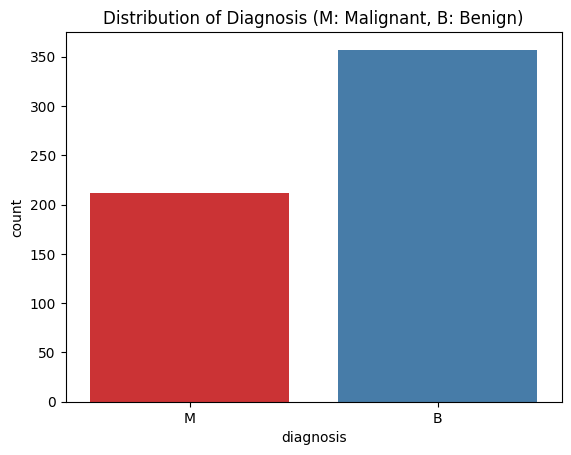

In [11]:
# Visualize the distribution of the diagnosis
sns.countplot(data=df, x='diagnosis', palette='Set1')
plt.title("Distribution of Diagnosis (M: Malignant, B: Benign)")
plt.show()

In [12]:
# Prepare the features and labels
X = df.drop(columns=['diagnosis', 'id', 'Unnamed: 32'])
y = df['diagnosis']

In [14]:
# Normalize the features
X = normalize(X)
X = pd.DataFrame(data=X, columns=df.drop(columns=['diagnosis', 'id', 'Unnamed: 32']).columns)

In [15]:
# Mapping diagnosis labels to numerical values
mapping_dict = {'M': 1, 'B': 0}
y = y.map(mapping_dict)

In [16]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Logistic Regression
modelLR = LogisticRegression(random_state=42)
modelLR.fit(X_train, y_train)
predLR = modelLR.predict(X_test)
print("Logistic Regression Accuracy: {:.2f}%".format(accuracy_score(y_test, predLR) * 100))

Logistic Regression Accuracy: 78.07%


In [18]:
# Gaussian Naive Bayes
modelGNB = GaussianNB()
predGNB = modelGNB.fit(X_train, y_train).predict(X_test)
print("Gaussian Naive Bayes Accuracy: {:.2f}%".format(accuracy_score(y_test, predGNB) * 100))

Gaussian Naive Bayes Accuracy: 83.33%


In [19]:
# K-Nearest Neighbors with hyperparameter tuning
param_grid_knn = {
    'n_neighbors': [5, 10, 15],  # Different values for neighbors
    'weights': ['uniform', 'distance']
}
modelKNC = KNeighborsClassifier()
grid_knn = GridSearchCV(modelKNC, param_grid_knn, cv=5)
grid_knn.fit(X_train, y_train)
predKNC = grid_knn.predict(X_test)
print("K-Nearest Neighbors Accuracy: {:.2f}%".format(accuracy_score(y_test, predKNC) * 100))
print("Best KNN parameters:", grid_knn.best_params_)

K-Nearest Neighbors Accuracy: 93.86%
Best KNN parameters: {'n_neighbors': 10, 'weights': 'distance'}


In [20]:
# Decision Tree Classifier
modelDTC = tree.DecisionTreeClassifier(max_depth=5)
predDTC = modelDTC.fit(X_train, y_train).predict(X_test)
print("Decision Tree Accuracy: {:.2f}%".format(accuracy_score(y_test, predDTC) * 100))

Decision Tree Accuracy: 92.98%


In [21]:
# Support Vector Classifier with GridSearch
modelSVC = svm.SVC()
param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [1, 0.1, 0.01],
    'degree': [2, 3],  # Only used for 'poly' kernel
}
grid_search = GridSearchCV(modelSVC, param_grid_svc, cv=5)
grid_search.fit(X_train, y_train)
predSVC = grid_search.predict(X_test)
print("Support Vector Classifier Accuracy: {:.2f}%".format(accuracy_score(y_test, predSVC) * 100))
print("Best SVC parameters:", grid_search.best_params_)

Support Vector Classifier Accuracy: 94.74%
Best SVC parameters: {'C': 10, 'degree': 3, 'gamma': 1, 'kernel': 'poly'}


In [22]:
# Neural Network Model
y_train = np.array(y_train)
y_test = np.array(y_test)

# Build the neural network
modelNN = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Increased neurons for better learning
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # For binary classification
])

# Compile the model
modelNN.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

# Train the model with validation
history = modelNN.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.1)

# Evaluate the model
loss, accuracy = modelNN.evaluate(X_test, y_test)
print("Neural Network Accuracy: {:.2f}%".format(accuracy * 100))

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5661 - loss: 0.6799 - val_accuracy: 0.6957 - val_loss: 0.6280
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6533 - loss: 0.6402 - val_accuracy: 0.6957 - val_loss: 0.6158
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6133 - loss: 0.6440 - val_accuracy: 0.6957 - val_loss: 0.5983
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6037 - loss: 0.6322 - val_accuracy: 0.6957 - val_loss: 0.5831
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6391 - loss: 0.5985 - val_accuracy: 0.7174 - val_loss: 0.5588
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7050 - loss: 0.5650 - val_accuracy: 0.7609 - val_loss: 0.5321
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7522 - loss: 0.5387 - val_accuracy: 0.7826 - val_loss: 0.4961
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8196 - loss: 0.4858 - val_accuracy: 0.8478 - val_loss: 0.

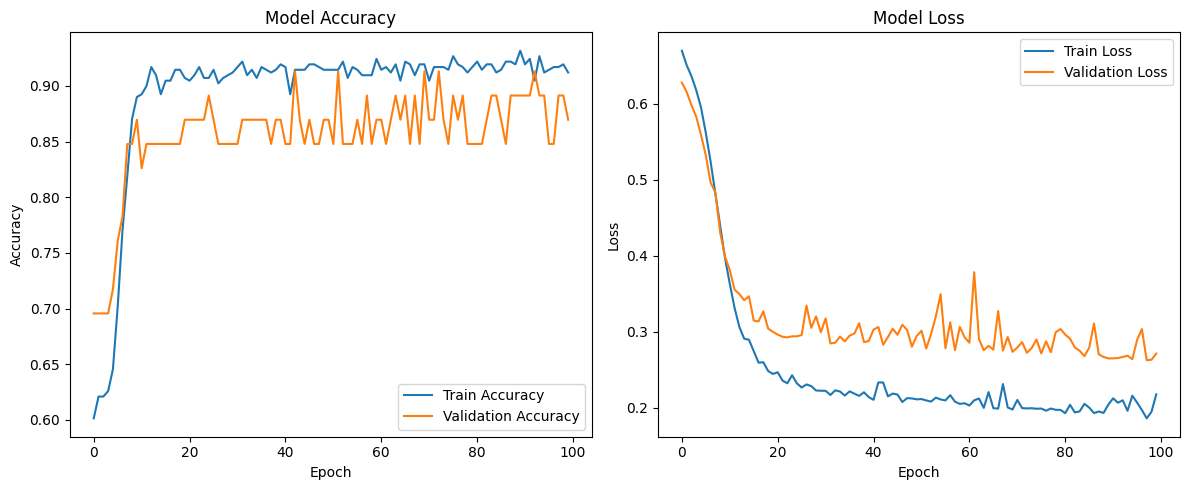

In [23]:
# Plotting the training history for the neural network
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()